In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/Topaz52/phishing-website-URL-dataset/main/combined_benign_phishing.csv

--2024-01-12 01:33:34--  https://raw.githubusercontent.com/Topaz52/phishing-website-URL-dataset/main/combined_benign_phishing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3582803 (3.4M) [text/plain]
Saving to: ‘combined_benign_phishing.csv’

combined_benign_phi 100%[===================>]   3.42M  --.-KB/s    in 0.03s   

2024-01-12 01:33:35 (102 MB/s) - ‘combined_benign_phishing.csv’ saved [3582803/3582803]



In [3]:
dataset = pd.read_csv('combined_benign_phishing.csv')
dataset.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,wmmayhem.com,0,0,0,0,0,0,0,0,0
1,ballymenaunitedyouthacademy.com,0,0,0,0,0,0,0,0,0
2,brusselsgaybars.com,0,0,0,0,0,0,0,0,0
3,sportsbettingtennis.net,0,0,0,0,0,0,0,0,0
4,i29.mobi,0,0,0,0,0,0,0,0,0


In [4]:
#Dropping the Domain column
data = dataset.drop(['Domain'], axis = 1).copy()

In [5]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
Label            0
dtype: int64

In [6]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((83000, 8), (83000,))



#  **Preprocessing**



In [7]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [8]:
# 1.Domain of the URL (Domain)
def getDomain(url):
  parsed_url = urlparse(url)
  domain = parsed_url.netloc
  return domain

In [9]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [10]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at

In [11]:
# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length = 0
  else:
    length = 1
  return length

In [12]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [13]:
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [14]:
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [15]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [16]:
# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [17]:
# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

In [18]:
# importing required packages for this section
import requests

In [19]:
# 10. IFrame Redirection (iFrame)
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [20]:
# 11.Checks the effect of mouse over on status bar (Mouse_Over)
def mouseOver(response):
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [21]:
# 12.Checks the status of the right click attribute (Right_Click)
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [22]:
# 13.Checks the number of forwardings (Web_Forwards)
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

In [23]:
# calls the other functions and stores all the features of the URL in the list. We will extract the features of each URL and append to this list.
#Function to extract features
def featureExtraction(url):

  features = []
  #Address bar based features (10)
  # features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))

  # features.append(label)

  return features

> **Decision Tree**

In [24]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((66400, 8), (16600, 8))

In [25]:
#importing packages
from sklearn.metrics import accuracy_score

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [26]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [27]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [28]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.781
Decision Tree: Accuracy on test Data: 0.782


In [29]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7818072289156627


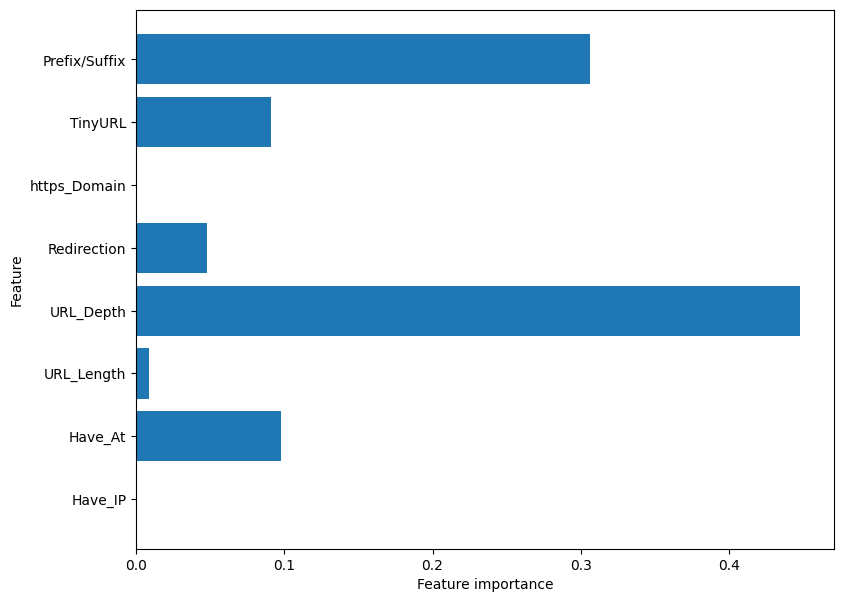

In [30]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

> # **Parameter**



In [31]:
# instantiate the model
tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [32]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [33]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.798
Decision Tree: Accuracy on test Data: 0.798


In [34]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7979518072289157


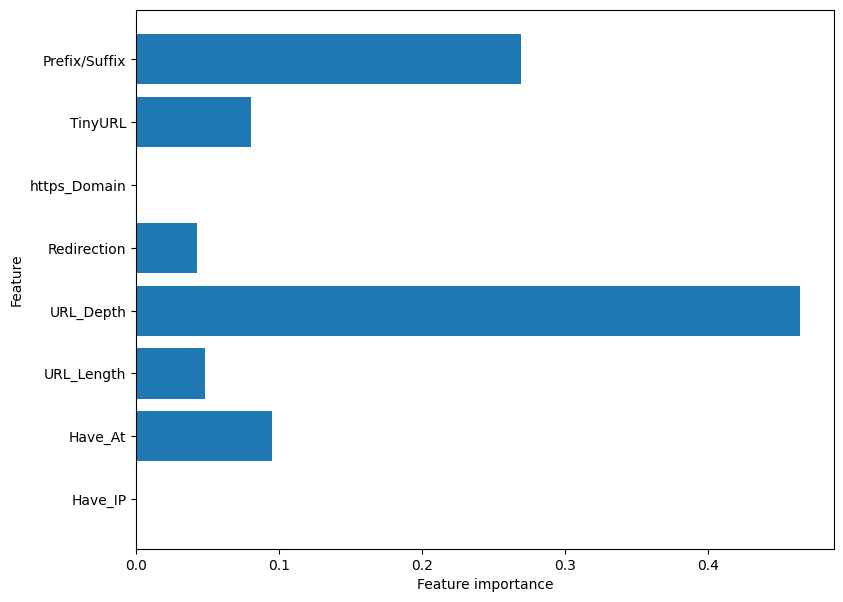

In [35]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

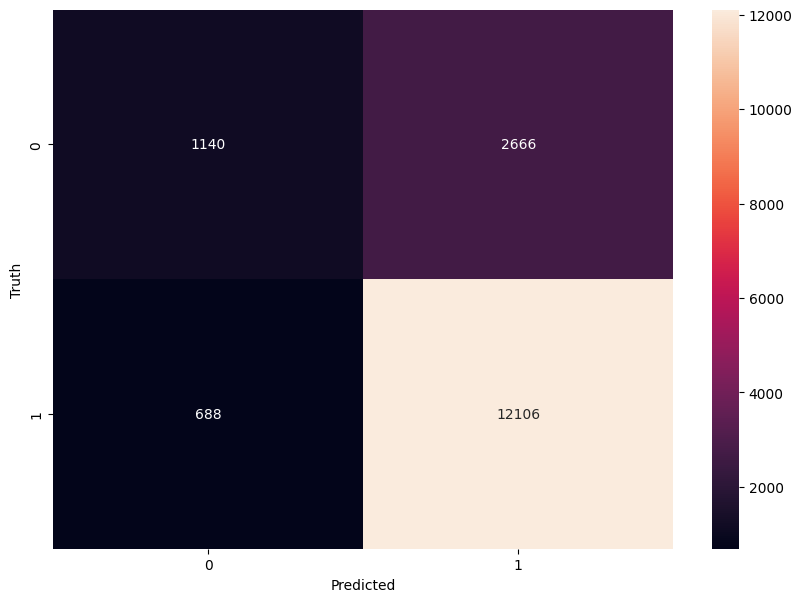

In [36]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = tree.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [39]:
def predict_phishing(url, tree):
  # Extract features from the URL
  url_features = featureExtraction(url)

  # Make predictions without scaling
  prediction = tree.predict([url_features])
  if prediction >= 0.99:
      print(url, "- PHISHING: ", prediction, "acc")
  else:
    print(url, "- NOT-PHISHING: ", prediction, "acc")

  return prediction[0]

In [40]:
sample_url = "https://colab.research.google.com/drive/1PKjem7g-w4UGtRcR9JLVkpLZJWAB6F5z#scrollTo=9LN5SS85du5P"
domain_processed = getDomain(sample_url)
print(domain_processed)
prediction_result = predict_phishing(sample_url, tree)

colab.research.google.com
https://colab.research.google.com/drive/1PKjem7g-w4UGtRcR9JLVkpLZJWAB6F5z#scrollTo=9LN5SS85du5P - PHISHING:  [1] acc


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [41]:
# save Tree model to file
import pickle
import joblib
# save the model to a file
joblib.dump(tree, 'tree.joblib')
pickle.dump(tree, open("tree.pkl", "wb"))